In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import pandas as pd
from skimage.measure import compare_ssim
from scipy.ndimage import gaussian_filter

In [2]:
# Two Years of Snow Depth to Compare
src = rasterio.open('../subsets/clpx_outcrops/raster/snow_depth/clpx_outcrops_snow_depth_2018.tif')
sd_2018 = src.read(1)
src = rasterio.open('../subsets/clpx_outcrops/raster/snow_depth/clpx_outcrops_snow_depth_2012.tif')
sd_2012 = src.read(1)

In [35]:
Gradient = np.empty(sd_2012.shape)
SSIM = np.empty(sd_2012.shape)
K1 = 0.01
K2 = 0.03
sigma = 1.5

data_range = sd_2012.max() - sd_2012.min()

ndim = sd_2012.ndim


filter_func = gaussian_filter
filter_args = {'sigma': sigma}

X = sd_2012.astype(np.float64)
Y = sd_2018.astype(np.float64)


cov_norm = 1.0  # population covariance to match Wang et. al. 2004

# compute (weighted) means
ux = filter_func(X, **filter_args)
uy = filter_func(Y, **filter_args)

# compute (weighted) variances and covariances
uxx = filter_func(X * X, **filter_args)
uyy = filter_func(Y * Y, **filter_args)
uxy = filter_func(X * Y, **filter_args)
vx = cov_norm * (uxx - ux * ux)
vy = cov_norm * (uyy - uy * uy)
vxy = cov_norm * (uxy - ux * uy)

R = data_range
C1 = (K1 * R) ** 2
C2 = (K2 * R) ** 2
print(R, C1, C2)

A1, A2, B1, B2 = ((2 * ux * uy + C1,
                   2 * vxy + C2,
                   ux ** 2 + uy ** 2 + C1,
                   vx + vy + C2))
D = B1 * B2
S = (A1 * A2) / D

#     # to avoid edge effects will ignore filter radius strip around edges
#     pad = (win_size - 1) // 2

#     # compute (weighted) mean of ssim
#     mssim = crop(S, pad).mean()

#     if gradient:
#         # The following is Eqs. 7-8 of Avanaki 2009.
grad = filter_func(A1 / D, **filter_args) * X
grad += filter_func(-S / B2, **filter_args) * Y
grad += filter_func((ux * (A2 - A1) - uy * (B2 - B1) * S) / D,
                            **filter_args)
grad *= (2 / X.size)

3.0029907 0.0009017953280359507 0.008116157952323556


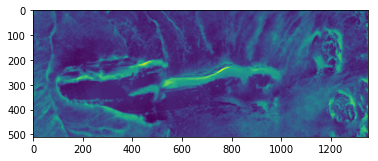

In [36]:
plt.imshow(ux)

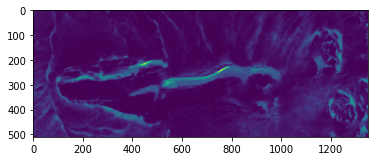

In [37]:
plt.imshow(uxx)

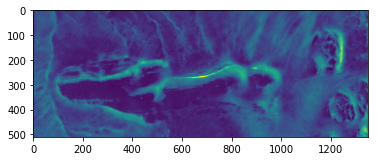

In [38]:
plt.imshow(uy)

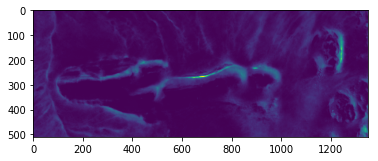

In [39]:
plt.imshow(uyy)

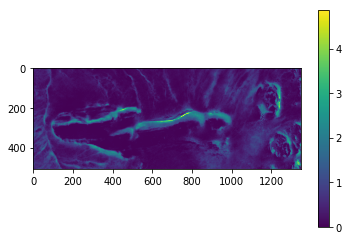

In [58]:
plt.imshow(uxy)
plt.colorbar()

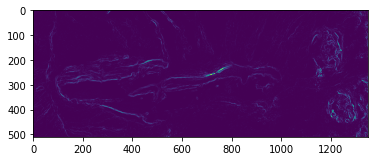

In [41]:
plt.imshow(vx)

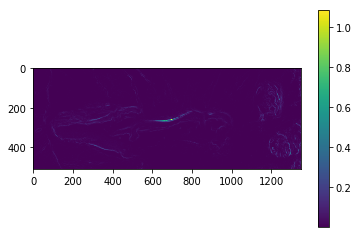

In [57]:
plt.imshow(vy)
plt.colorbar()

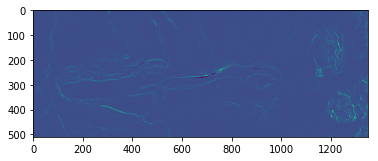

In [43]:
plt.imshow(vxy)

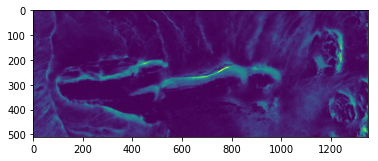

In [44]:
plt.imshow(A1)

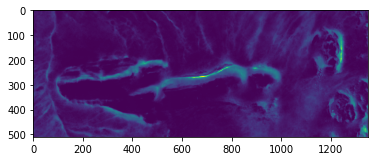

In [45]:
plt.imshow(B1)

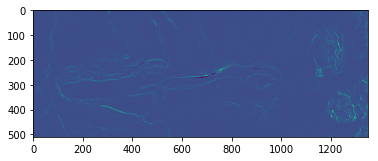

In [46]:
plt.imshow(A2)

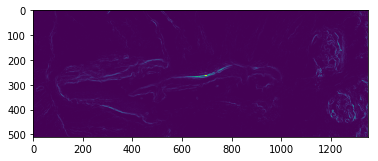

In [47]:
plt.imshow(B2)

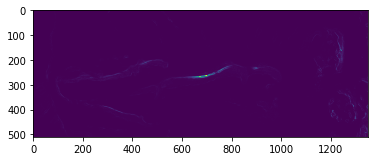

In [48]:
plt.imshow(D)

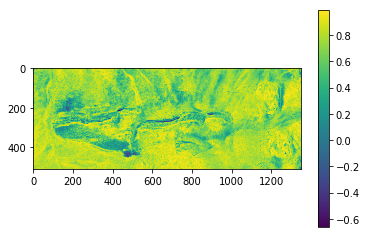

In [49]:
plt.imshow(S)
plt.colorbar()

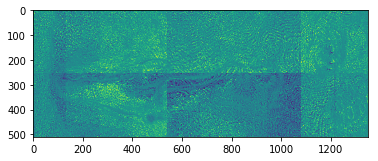

In [50]:
plt.imshow(grad)

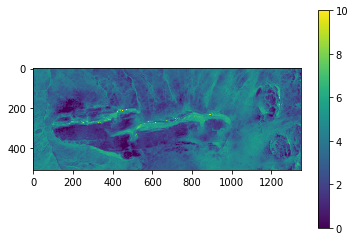

In [70]:
st = uxy / (vxy + (C2/2))
plt.imshow(np.log(np.abs(st)), vmin=0, vmax=10)
plt.colorbar()